In [3]:
# -----------------------------
# Step 1: Import libraries
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Step 2: Load dataset
# -----------------------------
df = pd.read_csv("/content/fake_job_postings.csv", on_bad_lines='skip')  # update filename if needed
print("Initial Shape:", df.shape)
print(df.columns)

# -----------------------------
# Step 3: Handle missing data
# -----------------------------
# Drop rows where target (fraudulent) is missing
df = df.dropna(subset=['fraudulent'])

# Fill missing text fields with empty string
df['description'] = df['description'].fillna('')

# Optional: verify
print("After cleaning:", df.shape)
print(df['fraudulent'].value_counts())

# -----------------------------
# Step 4: Define features (X) and target (y)
# -----------------------------
X = df['description']
y = df['fraudulent']

# -----------------------------
# Step 5: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# -----------------------------
# Step 6: TF-IDF vectorization
# -----------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shapes:")
print("Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# -----------------------------
# Step 7: Train SVM model
# -----------------------------
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# -----------------------------
# Step 8: Predictions and evaluation
# -----------------------------
y_pred = svm_model.predict(X_test_tfidf)

print("\n✅ Model Evaluation Results ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Initial Shape: (17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')
After cleaning: (17880, 18)
fraudulent
0    17014
1      866
Name: count, dtype: int64
Train size: 14304
Test size: 3576
TF-IDF shapes:
Train: (14304, 5000)  Test: (3576, 5000)

✅ Model Evaluation Results ✅
Accuracy: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.95      0.58      0.72       173

    accuracy                           0.98      3576
   macro avg       0.97      0.79      0.85      3576
weighted avg       0.98      0.98      0.98      3576



In [4]:
# -----------------------------
# Step 1: Import libraries
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Step 2: Load dataset
# -----------------------------
df = pd.read_csv("/content/fake_job_postings.csv", on_bad_lines='skip')    # change filename if needed
print("Initial Shape:", df.shape)
print(df.columns)

# -----------------------------
# Step 3: Handle missing data
# -----------------------------
# Fill missing text columns with empty strings
df['description'] = df['description'].fillna('')

# Fill missing target (fraudulent) with dummy value -1
df['fraudulent'] = df['fraudulent'].fillna(-1)

# -----------------------------
# Step 4: Separate labeled and unlabeled data
# -----------------------------
labeled_df = df[df['fraudulent'] != -1]      # rows with real labels (0 or 1)
unlabeled_df = df[df['fraudulent'] == -1]    # rows with dummy label (-1)

print("Labeled rows:", labeled_df.shape[0])
print("Unlabeled rows:", unlabeled_df.shape[0])

# -----------------------------
# Step 5: Define features (X) and target (y)
# -----------------------------
X = labeled_df['description']
y = labeled_df['fraudulent']

# -----------------------------
# Step 6: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# -----------------------------
# Step 7: TF-IDF Vectorization
# -----------------------------
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shapes:")
print("Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# -----------------------------
# Step 8: Train SVM Model
# -----------------------------
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# -----------------------------
# Step 9: Evaluate Model
# -----------------------------
y_pred = svm_model.predict(X_test_tfidf)

print("\n✅ Model Evaluation Results ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Step 10: Predict unlabeled data (optional)
# -----------------------------
if len(unlabeled_df) > 0:
    unlabeled_tfidf = tfidf.transform(unlabeled_df['description'])
    unlabeled_df['predicted_fraudulent'] = svm_model.predict(unlabeled_tfidf)
    print("\nPredicted fraudulent values for unlabeled data:")
    print(unlabeled_df[['job_id', 'predicted_fraudulent']].head())


Initial Shape: (17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')
Labeled rows: 17880
Unlabeled rows: 0
Train size: 14304
Test size: 3576
TF-IDF shapes:
Train: (14304, 5000)  Test: (3576, 5000)

✅ Model Evaluation Results ✅
Accuracy: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.95      0.58      0.72       173

    accuracy                           0.98      3576
   macro avg       0.97      0.79      0.85      3576
weighted avg       0.98      0.98      0.98      3576



In [5]:
# ==========================================
# STEP 1: Import libraries
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# STEP 2: Pre-clean the raw CSV file
# ==========================================
input_file = "/content/fake_job_postings.csv"
cleaned_file = "/content/cleaned_fake_job_postings.csv"

print("🧹 Cleaning CSV file...")

# Read raw lines safely (ignore encoding and invisible chars)
with open(input_file, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()

cleaned_lines = []
for line in lines:
    # Remove null bytes or weird control characters
    line = line.replace('\0', '')
    # Replace multiple commas or broken quotes with safe spacing
    line = re.sub(r'"+', '"', line)
    line = re.sub(r',+', ',', line)
    # Strip whitespace
    line = line.strip()
    if line:
        cleaned_lines.append(line)

# Write to a new cleaned file
with open(cleaned_file, "w", encoding="utf-8") as f:
    f.write("\n".join(cleaned_lines))

print(f"✅ Cleaned file saved as: {cleaned_file}")

# ==========================================
# STEP 3: Load the cleaned CSV safely
# ==========================================
df = pd.read_csv(cleaned_file, encoding="utf-8", engine="python", on_bad_lines="skip")
print("✅ CSV Loaded Successfully! Shape:", df.shape)
print("Columns:", list(df.columns))

# ==========================================
# STEP 4: Handle missing data
# ==========================================
# Fill missing text fields with empty strings
text_cols = ['title', 'description', 'requirements']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('')
    else:
        df[col] = ''  # create if missing

# Fill missing target with dummy -1
df['fraudulent'] = df['fraudulent'].fillna(-1)

# Separate labeled and unlabeled data
labeled_df = df[df['fraudulent'] != -1]
unlabeled_df = df[df['fraudulent'] == -1]

print("Labeled samples:", labeled_df.shape[0])
print("Unlabeled samples:", unlabeled_df.shape[0])

# ==========================================
# STEP 5: Combine text columns
# ==========================================
labeled_df['text'] = (
    labeled_df['title'].astype(str) + ' ' +
    labeled_df['description'].astype(str) + ' ' +
    labeled_df['requirements'].astype(str)
)

# ==========================================
# STEP 6: Text cleaning & preprocessing
# ==========================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

print("🧠 Cleaning text data... (takes time)")
labeled_df['clean_text'] = labeled_df['text'].apply(clean_text)

# ==========================================
# STEP 7: Train-test split
# ==========================================
X = labeled_df['clean_text']
y = labeled_df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# STEP 8: TF-IDF Vectorization
# ==========================================
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    sublinear_tf=True,
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# ==========================================
# STEP 9: Train SVM Model
# ==========================================
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# ==========================================
# STEP 10: Evaluate Model
# ==========================================
y_pred = svm_model.predict(X_test_tfidf)

print("\n✅ MODEL PERFORMANCE ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================================
# STEP 11: Predict unlabeled data (optional)
# ==========================================
if len(unlabeled_df) > 0:
    unlabeled_df['text'] = (
        unlabeled_df['title'].astype(str) + ' ' +
        unlabeled_df['description'].astype(str) + ' ' +
        unlabeled_df['requirements'].astype(str)
    )
    unlabeled_df['clean_text'] = unlabeled_df['text'].apply(clean_text)
    unlabeled_tfidf = tfidf.transform(unlabeled_df['clean_text'])
    unlabeled_df['predicted_fraudulent'] = svm_model.predict(unlabeled_tfidf)

    print("\n🔍 Sample Predictions for Unlabeled Data:")
    print(unlabeled_df[['job_id', 'predicted_fraudulent']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


🧹 Cleaning CSV file...
✅ Cleaned file saved as: /content/cleaned_fake_job_postings.csv
✅ CSV Loaded Successfully! Shape: (16608, 18)
Columns: ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']
Labeled samples: 699
Unlabeled samples: 15909
🧠 Cleaning text data... (takes time)


/tmp/ipython-input-4094767984.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['text'] = (
/tmp/ipython-input-4094767984.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_df['clean_text'] = labeled_df['text'].apply(clean_text)


TF-IDF shapes -> Train: (559, 10000)  Test: (140, 10000)

✅ MODEL PERFORMANCE ✅
Accuracy: 0.9643

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       126
         1.0       1.00      0.64      0.78        14

    accuracy                           0.96       140
   macro avg       0.98      0.82      0.88       140
weighted avg       0.97      0.96      0.96       140



/tmp/ipython-input-4094767984.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['text'] = (
/tmp/ipython-input-4094767984.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['clean_text'] = unlabeled_df['text'].apply(clean_text)



🔍 Sample Predictions for Unlabeled Data:
   job_id  predicted_fraudulent
0       1                   0.0
1       2                   0.0
2       3                   0.0
3       4                   0.0
4       5                   0.0


/tmp/ipython-input-4094767984.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['predicted_fraudulent'] = svm_model.predict(unlabeled_tfidf)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Data loaded and cleaned. Shape: (17880, 19)
Train size: 14304
Test size: 3576
🧠 Cleaning training and test text...
TF-IDF shapes -> Train: (14304, 10000)  Test: (3576, 10000)

✅ MODEL PERFORMANCE ✅
Accuracy: 0.9838

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.98      0.68      0.80       173

    accuracy                           0.98      3576
   macro avg       0.98      0.84      0.90      3576
weighted avg       0.98      0.98      0.98      3576



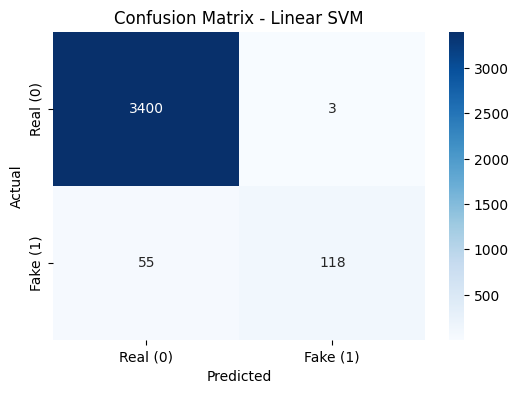

In [9]:
# ==========================================
# Step 1: Import libraries
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# Step 2: Load and clean raw data
# ==========================================
df = pd.read_csv("/content/fake_job_postings.csv", encoding="utf-8", on_bad_lines="skip")

# Basic cleaning
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')

# Combine text fields
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

print("✅ Data loaded and cleaned. Shape:", df.shape)

# ==========================================
# Step 3: Train-test split
# ==========================================
X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ==========================================
# Step 4: Preprocess (text cleaning)
# ==========================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

print("🧠 Cleaning training and test text...")

X_train_clean = X_train.apply(clean_text)
X_test_clean = X_test.apply(clean_text)

# ==========================================
# Step 5: TF-IDF Vectorization
# ==========================================
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_clean)

print("TF-IDF shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# ==========================================
# Step 6: Train SVM Model
# ==========================================
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# ==========================================
# Step 7: Evaluate Model
# ==========================================
y_pred = svm_model.predict(X_test_tfidf)

print("\n✅ MODEL PERFORMANCE ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================================
# Step 8: Confusion Matrix
# ==========================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real (0)', 'Fake (1)'],
            yticklabels=['Real (0)', 'Fake (1)'])

plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Data loaded and cleaned. Shape: (17880, 19)
Train size: 14304
Test size: 3576
🧠 Cleaning text data...
TF-IDF shapes -> Train: (14304, 10000)  Test: (3576, 10000)
🚀 Training XGBoost model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:33:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ MODEL PERFORMANCE ✅
Accuracy: 0.9799

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.83      0.74      0.78       173

    accuracy                           0.98      3576
   macro avg       0.91      0.87      0.88      3576
weighted avg       0.98      0.98      0.98      3576



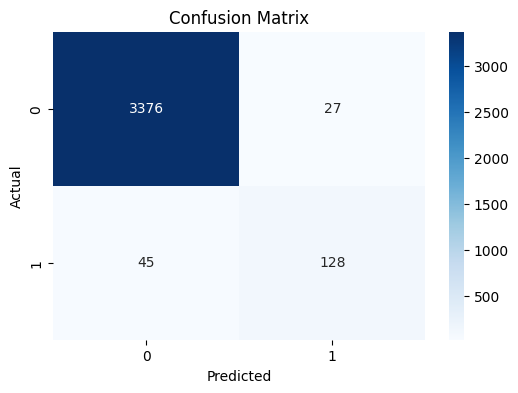

ℹ️ 0 = Real job | 1 = Fake job


In [7]:
# ==========================================
# STEP 1: Import libraries
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# STEP 2: Load and Clean Data
# ==========================================
df = pd.read_csv("/content/fake_job_postings.csv", encoding="utf-8", on_bad_lines="skip")

# Basic cleaning
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')

# Combine text columns
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

print("✅ Data loaded and cleaned. Shape:", df.shape)

# ==========================================
# STEP 3: Train-Test Split (before preprocessing)
# ==========================================
X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ==========================================
# STEP 4: Preprocess Text
# ==========================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

print("🧠 Cleaning text data...")
X_train_clean = X_train.apply(clean_text)
X_test_clean = X_test.apply(clean_text)

# ==========================================
# STEP 5: TF-IDF Vectorization
# ==========================================
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_clean)

print("TF-IDF shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# ==========================================
# STEP 6: Train XGBoost Model
# ==========================================
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1]))  # handles imbalance
)

print("🚀 Training XGBoost model...")
xgb_model.fit(X_train_tfidf, y_train)

# ==========================================
# STEP 7: Evaluate Model
# ==========================================
y_pred = xgb_model.predict(X_test_tfidf)

print("\n✅ MODEL PERFORMANCE ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================================
# STEP 8: Confusion Matrix
# ==========================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================================
# STEP 9: Quick Summary
# ==========================================
print("ℹ️ 0 = Real job | 1 = Fake job")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Data loaded and cleaned. Shape: (17880, 19)
Train size: 14304
Test size: 3576
🧠 Cleaning text data...
TF-IDF shapes -> Train: (14304, 5000)  Test: (3576, 5000)
🚀 Training KNN model...

✅ MODEL PERFORMANCE ✅
Accuracy: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       0.89      0.62      0.73       173

    accuracy                           0.98      3576
   macro avg       0.94      0.81      0.86      3576
weighted avg       0.98      0.98      0.98      3576



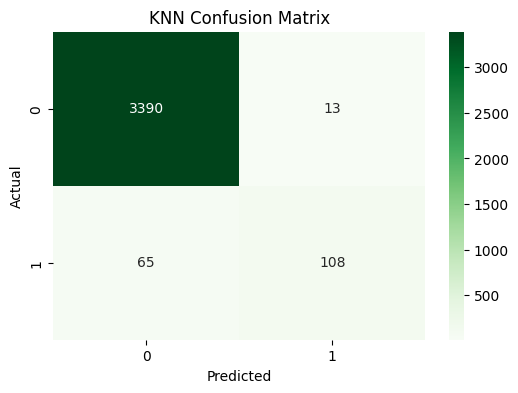

ℹ️ Label meanings: 0 = Real job | 1 = Fake job


In [8]:
# ==========================================
# STEP 1: Import libraries
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download required nltk resources
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================================
# STEP 2: Load and Clean Data
# ==========================================
df = pd.read_csv("/content/fake_job_postings.csv", encoding="utf-8", on_bad_lines="skip")

# Remove duplicates and missing labels
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

# Fill missing text columns
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')

# Combine text columns into a single feature
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

print("✅ Data loaded and cleaned. Shape:", df.shape)

# ==========================================
# STEP 3: Train–Test Split
# ==========================================
X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

# ==========================================
# STEP 4: Preprocess Text
# ==========================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), " ", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

print("🧠 Cleaning text data...")
X_train_clean = X_train.apply(clean_text)
X_test_clean = X_test.apply(clean_text)

# ==========================================
# STEP 5: TF-IDF Vectorization
# ==========================================
tfidf = TfidfVectorizer(
    max_features=5000,        # fewer features to speed up KNN
    ngram_range=(1, 2),
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf = tfidf.transform(X_test_clean)

print("TF-IDF shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)

# ==========================================
# STEP 6: Train KNN Model
# ==========================================
# KNN can be slow with large data, so we’ll use k=5 (common starting point)
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='cosine',     # cosine distance works better for text vectors
    n_jobs=-1
)

print("🚀 Training KNN model...")
knn_model.fit(X_train_tfidf, y_train)

# ==========================================
# STEP 7: Evaluate Model
# ==========================================
y_pred = knn_model.predict(X_test_tfidf)

print("\n✅ MODEL PERFORMANCE ✅")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ==========================================
# STEP 8: Confusion Matrix
# ==========================================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==========================================
# STEP 9: Summary
# ==========================================
print("ℹ️ Label meanings: 0 = Real job | 1 = Fake job")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8847262247838616
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       174
           1       0.88      0.89      0.89       173

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347



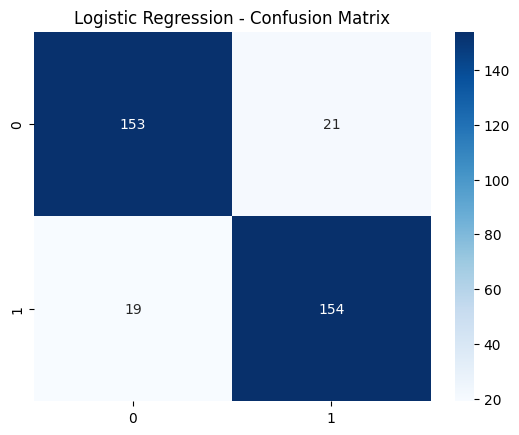

In [4]:
# ==========================================
# LOGISTIC REGRESSION - FULL CODE
# ==========================================
import pandas as pd
import numpy as np
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip")
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['text'] = df['title'] + " " + df['description'] + " " + df['requirements']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['fraudulent'], test_size=0.2, random_state=42, stratify=df['fraudulent']
)

# Preprocess
stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

def clean(t):
    t = t.lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"<.*?>", "", t)
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\d+", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    return " ".join(lemma.lemmatize(w) for w in t.split() if w not in stop_words)

X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

# TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train
model = LogisticRegression(max_iter=300)
model.fit(X_train_vec, y_train)

# Predict
pred = model.predict(X_test_vec)

# Results
print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# Confusion Matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8328530259365994
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       174
           1       0.79      0.90      0.84       173

    accuracy                           0.83       347
   macro avg       0.84      0.83      0.83       347
weighted avg       0.84      0.83      0.83       347



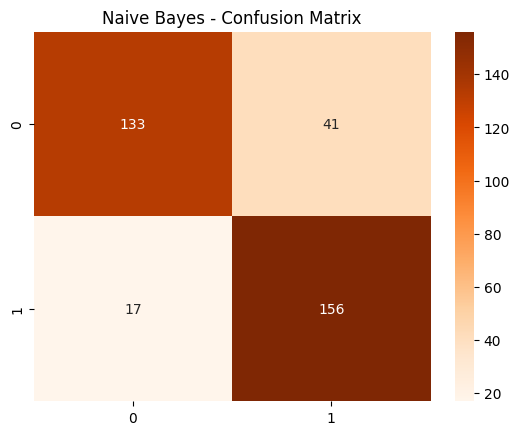

In [5]:
# ==========================================
# NAIVE BAYES - FULL CODE
# ==========================================
import pandas as pd
import numpy as np
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip")
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['title'] = df['title'].fillna('')
df['description'] = df['description'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['text'] = df['title'] + " " + df['description'] + " " + df['requirements']

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['fraudulent'], test_size=0.2, random_state=42, stratify=df['fraudulent']
)

stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

def clean(t):
    t = t.lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"<.*?>", "", t)
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\d+", "", t)
    t = re.sub(r"\s+", " ", t).strip()
    return " ".join(lemma.lemmatize(w) for w in t.split() if w not in stop_words)

X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

tfidf = TfidfVectorizer(max_features=10000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7867435158501441
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       174
           1       0.82      0.73      0.77       173

    accuracy                           0.79       347
   macro avg       0.79      0.79      0.79       347
weighted avg       0.79      0.79      0.79       347



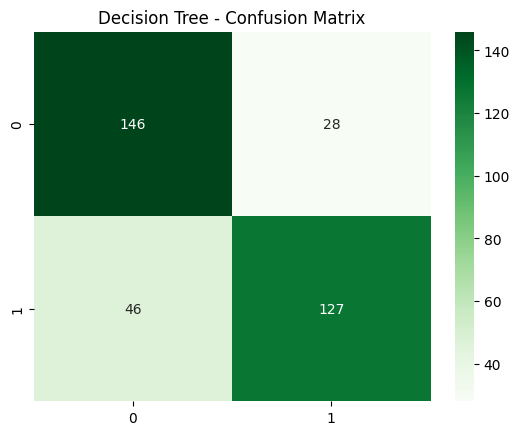

In [6]:
# ==========================================
# DECISION TREE - FULL CODE
# ==========================================
import pandas as pd
import numpy as np
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip").drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['text'] = df['title'].fillna('') + " " + df['description'].fillna('') + " " + df['requirements'].fillna('')

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['fraudulent'], test_size=0.2, random_state=42, stratify=df['fraudulent']
)

stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

def clean(t):
    t = t.lower()
    t = re.sub(r"http\S+", "", t)
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\s+", " ", t)
    return " ".join(lemma.lemmatize(w) for w in t.split() if w not in stop_words)

X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

tfidf = TfidfVectorizer(max_features=8000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

model = DecisionTreeClassifier(max_depth=20, random_state=42)
model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7982708933717579
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       174
           1       0.78      0.82      0.80       173

    accuracy                           0.80       347
   macro avg       0.80      0.80      0.80       347
weighted avg       0.80      0.80      0.80       347



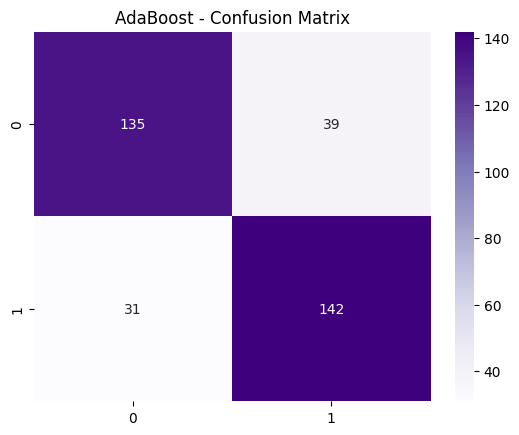

In [7]:
# ==========================================
# ADABOOST - FULL CODE
# ==========================================
import pandas as pd
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip").drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['text'] = df['title'].fillna('') + " " + df['description'].fillna('') + " " + df['requirements'].fillna('')

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['fraudulent'], test_size=0.2, random_state=42, stratify=df['fraudulent']
)

stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

def clean(t):
    t = t.lower()
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\s+", " ", t)
    return " ".join(lemma.lemmatize(w) for w in t.split() if w not in stop_words)

X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

tfidf = TfidfVectorizer(max_features=8000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

model = AdaBoostClassifier(n_estimators=150, learning_rate=0.5)
model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("AdaBoost - Confusion Matrix")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8674351585014409
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       174
           1       0.87      0.86      0.87       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



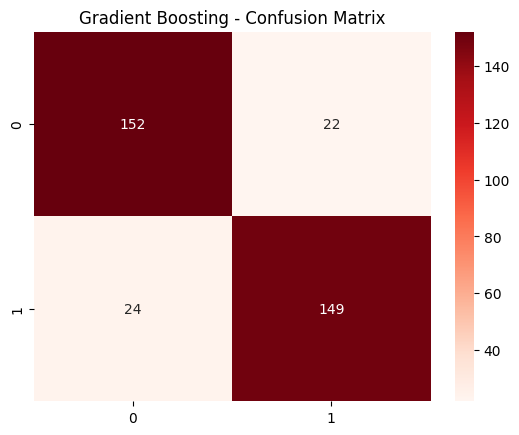

In [8]:
# ==========================================
# GRADIENT BOOSTING - FULL CODE
# ==========================================
import pandas as pd
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip").drop_duplicates()
df = df.dropna(subset=['fraudulent'])
df['text'] = df['title'].fillna('') + " " + df['description'].fillna('') + " " + df['requirements'].fillna('')

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['fraudulent'], test_size=0.2, random_state=42, stratify=df['fraudulent']
)

stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

def clean(t):
    t = t.lower()
    t = re.sub(f"[{re.escape(string.punctuation)}]", " ", t)
    t = re.sub(r"\s+", " ", t)
    return " ".join(lemma.lemmatize(w) for w in t.split() if w not in stop_words)

X_train = X_train.apply(clean)
X_test = X_test.apply(clean)

tfidf = TfidfVectorizer(max_features=9000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

model = GradientBoostingClassifier()
model.fit(X_train_vec, y_train)
pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


In [10]:
# ============================
# XGBOOST CLASSIFIER PIPELINE
# ============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines='skip')

# Step 2: CLEANING
# ---------------------------------------
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])  # target must not be NA

text_cols = ['title', 'location', 'department', 'salary_range',
             'company_profile', 'description', 'requirements',
             'benefits', 'employment_type', 'required_experience',
             'required_education', 'industry', 'function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: SPLIT FIRST
# ---------------------------------------
X = df[text_cols]
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: PREPROCESSING AFTER SPLIT
# ---------------------------------------
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_features=5000), 'description')
], remainder='drop')

# Step 5: Build XGBoost model pipeline
model = Pipeline([
    ("tfidf", preprocessor),
    ("clf", XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    ))
])

# Step 6: Train
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Metrics
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX:")
print(cm)
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))



CONFUSION MATRIX:
[[152  22]
 [ 22 151]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       174
           1       0.87      0.87      0.87       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347




CONFUSION MATRIX (Linear SVM):
[[149  25]
 [ 28 145]]

CLASSIFICATION REPORT (Linear SVM):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.85      0.84      0.85       173

    accuracy                           0.85       347
   macro avg       0.85      0.85      0.85       347
weighted avg       0.85      0.85      0.85       347



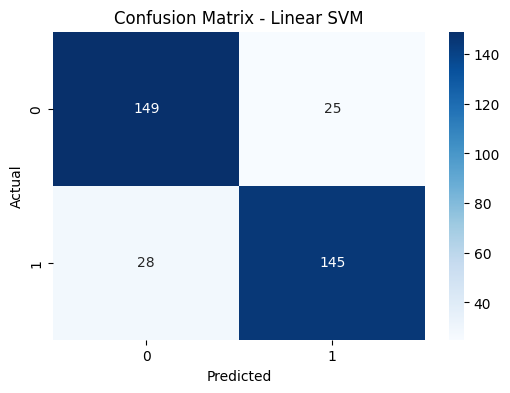

In [11]:
# ============================
# LINEAR SVM (LinearSVC)
# ============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines='skip')

# Step 2: CLEANING
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

text_cols = ['title', 'location', 'department', 'salary_range',
             'company_profile', 'description', 'requirements',
             'benefits', 'employment_type', 'required_experience',
             'required_education', 'industry', 'function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: SPLIT FIRST
X = df[text_cols]
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: PREPROCESS
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_features=4000), 'description')
])

# Step 5: Linear SVM pipeline
model_svm_linear = Pipeline([
    ("tfidf", preprocessor),
    ("svm", LinearSVC())
])

# Step 6: Train
model_svm_linear.fit(X_train, y_train)

# Step 7: Predict
y_pred = model_svm_linear.predict(X_test)

# Step 8: Metrics
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX (Linear SVM):")
print(cm)
print("\nCLASSIFICATION REPORT (Linear SVM):")
print(classification_report(y_test, y_pred))

# Step 9: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



CONFUSION MATRIX (RBF SVM):
[[163  11]
 [ 35 138]]

CLASSIFICATION REPORT (RBF SVM):
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       174
           1       0.93      0.80      0.86       173

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       347
weighted avg       0.87      0.87      0.87       347



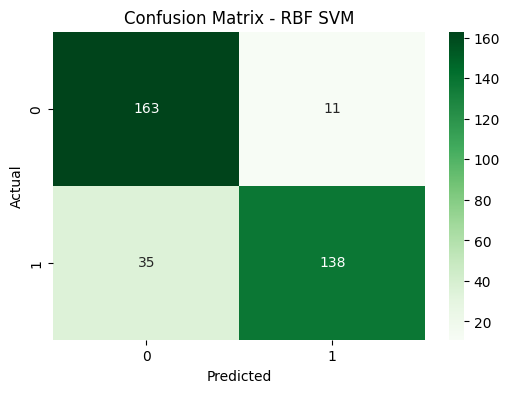

In [12]:
# ============================
# NON-LINEAR SVM (RBF)
# ============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines='skip')

# Step 2: CLEANING
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

text_cols = ['title', 'location', 'department', 'salary_range',
             'company_profile', 'description', 'requirements',
             'benefits', 'employment_type', 'required_experience',
             'required_education', 'industry', 'function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: SPLIT FIRST
X = df[text_cols]
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: PREPROCESS
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_features=4000), 'description')
])

# Step 5: RBF SVM pipeline
model_svm_rbf = Pipeline([
    ("tfidf", preprocessor),
    ("scale", StandardScaler(with_mean=False)),
    ("svm", SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# Step 6: Train
model_svm_rbf.fit(X_train, y_train)

# Step 7: Predict
y_pred = model_svm_rbf.predict(X_test)

# Step 8: Metrics
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX (RBF SVM):")
print(cm)
print("\nCLASSIFICATION REPORT (RBF SVM):")
print(classification_report(y_test, y_pred))

# Step 9: Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



CONFUSION MATRIX (KNN):
[[ 28 146]
 [  0 173]]

CLASSIFICATION REPORT (KNN):
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       174
           1       0.54      1.00      0.70       173

    accuracy                           0.58       347
   macro avg       0.77      0.58      0.49       347
weighted avg       0.77      0.58      0.49       347



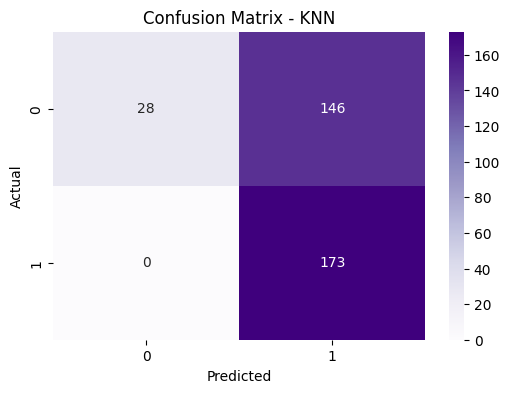

In [13]:
# ============================
# K-NEAREST NEIGHBORS (KNN)
# ============================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip")

# Step 2: Clean
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

text_cols = ['title','location','department','salary_range','company_profile',
             'description','requirements','benefits','employment_type',
             'required_experience','required_education','industry','function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: Split before preprocessing
X = df[text_cols]
y = df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: TF-IDF only for description
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_features=4000), "description")
])

# Step 5: KNN Pipeline
model_knn = Pipeline([
    ("tfidf", preprocessor),
    ("scale", StandardScaler(with_mean=False)),   # KNN NEEDS SCALING
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

# Step 6: Train
model_knn.fit(X_train, y_train)

# Step 7: Predict
y_pred = model_knn.predict(X_test)

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX (KNN):")
print(cm)
print("\nCLASSIFICATION REPORT (KNN):")
print(classification_report(y_test, y_pred))

# Step 9: Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



CONFUSION MATRIX (XGBoost):
[[152  22]
 [ 19 154]]

CLASSIFICATION REPORT (XGBoost):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       174
           1       0.88      0.89      0.88       173

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347



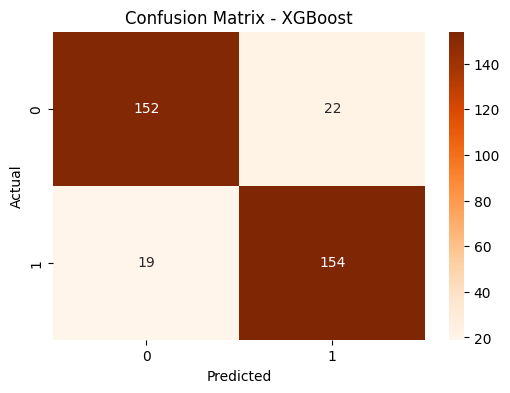

In [14]:
# ============================
# XGBOOST CLASSIFIER
# ============================

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines="skip")

# Step 2: Clean
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

text_cols = ['title','location','department','salary_range','company_profile',
             'description','requirements','benefits','employment_type',
             'required_experience','required_education','industry','function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: Split
X = df[text_cols]
y = df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Preprocess
preprocessor = ColumnTransformer([
    ("tfidf", TfidfVectorizer(max_features=4000), "description")
])

# class imbalance fix
scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Step 5: XGBoost pipeline
model_xgb = Pipeline([
    ("tfidf", preprocessor),
    ("xgb", XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=300,
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        scale_pos_weight=scale_weight
    ))
])

# Step 6: Train
model_xgb.fit(X_train, y_train)

# Step 7: Predict
y_pred = model_xgb.predict(X_test)

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX (XGBoost):")
print(cm)
print("\nCLASSIFICATION REPORT (XGBoost):")
print(classification_report(y_test, y_pred))

# Step 9: Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



CONFUSION MATRIX (Improved KNN):
[[ 73 101]
 [  0 173]]

CLASSIFICATION REPORT (Improved KNN):
              precision    recall  f1-score   support

           0       1.00      0.42      0.59       174
           1       0.63      1.00      0.77       173

    accuracy                           0.71       347
   macro avg       0.82      0.71      0.68       347
weighted avg       0.82      0.71      0.68       347



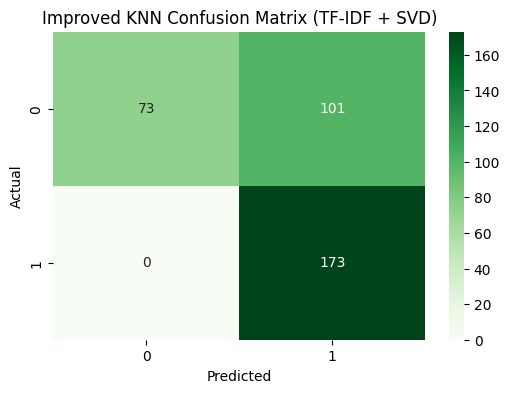

In [15]:
# ==========================================
# HIGH PERFORMANCE KNN WITH SVD
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load
df = pd.read_csv("/content/balanced_fake_job_postings.csv", on_bad_lines='skip')

# Step 2: Clean
df = df.drop_duplicates()
df = df.dropna(subset=['fraudulent'])

text_cols = ['title','location','department','salary_range','company_profile',
             'description','requirements','benefits','employment_type',
             'required_experience','required_education','industry','function']

for col in text_cols:
    df[col] = df[col].fillna("missing_value")

# Step 3: Split
X = df['description']     # best performing single field
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: TF-IDF + SVD + Scaling pipeline
preprocess = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=7000, ngram_range=(1,2))),
    ("svd", TruncatedSVD(n_components=200, random_state=42)),  # reduces dimensionality
    ("scale", StandardScaler())  # required for KNN
])

# Step 5: KNN model
model_knn = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier(n_neighbors=7, weights='distance'))
])

# Step 6: Train
model_knn.fit(X_train, y_train)

# Step 7: Predict
y_pred = model_knn.predict(X_test)

# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred).astype(int)

print("\nCONFUSION MATRIX (Improved KNN):")
print(cm)
print("\nCLASSIFICATION REPORT (Improved KNN):")
print(classification_report(y_test, y_pred))

# Step 9: Plot CM
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Improved KNN Confusion Matrix (TF-IDF + SVD)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
